# Project 2 - Two-mode Network Dataset (DATA 620) 

### Topic: Baseball player steroid use

### Authors: John Mazon, LeTicia Cancel, Bharani Nitalla

### video:

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import matplotlib.pyplot as plt
import matplotlib

### Description of Dataset:

Two networks representing steroid use among baseball players. First, a bipartite network of players and their steroid providers (of illegal performance-enhancing substances). Second, a one-mode projection of players, which are linked if they have a common
supplier.

The List of Major League Baseball players named in the Mitchell Report includes active and former Major League players as well as free agents. The Mitchell Report is the result of former US Senator George J. Mitchell's (D–ME) 20-month investigation into performance-enhancing drug use in Major League Baseball (MLB). It was released December 13, 2007.

The following is a list of the Major League Baseball players named in the Mitchell Report.[1][2][3][4][5] Inclusion on the list does not necessarily mean the player was involved in illegal activity. In some instances, insufficient evidence was provided to draw a conclusion, and some players were mentioned in other contexts.

### Background info
Social network analysis [SNA] is the mapping and measuring of relationships and flows between people, groups, organizations, computers, URLs, and other connected information/knowledge entities. The nodes in the network are the people and groups while the links show relationships or flows between the nodes. SNA provides both a visual and a mathematical analysis of human relationships. 

When the Mitchell Report, on steroid use in Major League Baseball [MLB], was published people were surprised at both the number and names of those who were mentioned. The diagram below shows a network map created from data found in the Mitchell Report. Baseball players are shown as well as those who were found to be providers of steroids and other illegal performance enhancing substances appear. The links reveal the flow of chemicals -- from providers to players.



### Hypothesis :
Using various measures in networkx we will prove Kirk Radomski to be the most influential in the network

# Section 1 - importing the data

In [2]:
#reading csv files
df_edges = pd.read_csv('band.csv/edges.csv')
df_nodes = pd.read_csv('band.csv/nodes.csv')

In [3]:
df_nodes

,# index,name,_pos
0,0,BALCO,"array([ 0.42916385, -1.06252603])"
1,1,Greg_Anderson,"array([ 0.92099285, -0.80835392])"
2,2,Palm_Beach_Rejuvenation_Centre,"array([-0.4604673 , -2.28633679])"
3,3,New_Hope_Health_Centre,"array([ 0.97088245, -4.86546354])"
4,4,Signature_Pharmacy,"array([-0.30669722, -3.17679839])"
...,...,...,...
79,79,Mike_Bell,"array([ 2.47275041, -3.19814548])"
80,80,Bart_Miadich,"array([ 2.13836021, -2.33889511])"
81,81,Jim_Parque,"array([ 2.71360296, -3.34106552])"
82,82,Phil_Hiatt,"array([ 2.92429591, -3.42093518])"


The BALCO scandal was a scandal involving the use of banned, performance-enhancing substances by professional athletes. The Bay Area Laboratory Co-operative (BALCO) was a San Francisco Bay Area business which supplied anabolic steroids to professional athletes. The incident surrounds a 2002 US federal government investigation of the laboratory.

According to the Mitchell Report on doping in baseball, the Palm Beach Rejuvenation Center supplied human growth hormone and steroids to several baseball players, including Cleveland Indians pitcher Paul Byrd, who bought nearly $25,000 worth of HGH in 13 transactions between August 2002 and January 2005.

Greg F. Anderson (born February 1966) is an American personal trainer, best known for his work with baseball player Barry Bonds, and links with BALCO.
Anderson allegedly began providing Bonds with performance-enhancing drugs in 1998. He was also linked in this regard to both Jason Giambi and Gary Sheffield, through his connections with Bonds. Despite this information, the San Francisco Giants, allegedly in order to appease Bonds, did not bar Anderson from Giants' facilities. On July 15, 2005, Anderson, in a deal with federal prosecutors, pleaded guilty to conspiracy to distribute steroids and to money-laundering.On October 18, 2005, he was sentenced by U.S. District Court Judge Susan Illston to three months in prison and three months' home confinement.




In [4]:
providers = ["BALCO", "Greg_Anderson", "Palm_Beach_Rejuvenation_Centre", 'New_Hope_Health_Centre', 'Signature_Pharmacy',  'American_Pharmaceutical_Group',
            'Health_Rejuvenation_Centre', 'Applied_Pharmacy_Services', 'Arizona_AntiAging_Clinic', 'Health_Watch_Clinic', 'Glenallen_Hill']
players = list( set(list(df_nodes.iloc[:, 1])) - set(providers) )

In [5]:
df_edges.head()

,# source,target
0,12,0
1,13,0
2,14,0
3,14,1
4,15,0


In [6]:
#initialize graph
G = nx.Graph()
print(df_edges)
print(df_nodes)
#we print the df_edges and df_nodes to visualize better the data

    # source   target
0         12        0
1         13        0
2         14        0
3         14        1
4         15        0
..       ...      ...
79        79       11
80        80       11
81        81       11
82        82       11
83        83       11

[84 rows x 2 columns]
    # index                            name                               _pos
0         0                           BALCO  array([ 0.42916385, -1.06252603])
1         1                   Greg_Anderson  array([ 0.92099285, -0.80835392])
2         2  Palm_Beach_Rejuvenation_Centre  array([-0.4604673 , -2.28633679])
3         3          New_Hope_Health_Centre  array([ 0.97088245, -4.86546354])
4         4              Signature_Pharmacy  array([-0.30669722, -3.17679839])
..      ...                             ...                                ...
79       79                       Mike_Bell  array([ 2.47275041, -3.19814548])
80       80                    Bart_Miadich  array([ 2.13836021, -2.33889511])
81

In [7]:
#find edges
def ObtainEdges(df):
    edges_list = [];
    for index, info in df.iterrows():
        edges_list.append((info[0], info[1]))

    return edges_list

In [8]:
#obtaining from df_edges to input into edges_list
edges_list = ObtainEdges(df_edges)

In [218]:
#print out a portion of the edges list
edges_list[0:12]

[(12, 0),
 (13, 0),
 (14, 0),
 (14, 1),
 (15, 0),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 0),
 (19, 1),
 (20, 0)]

In [216]:
#print out a portion of the df_nodes
df_nodes[0:12]

,# index,name,_pos
0,0,BALCO,"array([ 0.42916385, -1.06252603])"
1,1,Greg_Anderson,"array([ 0.92099285, -0.80835392])"
2,2,Palm_Beach_Rejuvenation_Centre,"array([-0.4604673 , -2.28633679])"
3,3,New_Hope_Health_Centre,"array([ 0.97088245, -4.86546354])"
4,4,Signature_Pharmacy,"array([-0.30669722, -3.17679839])"
5,5,American_Pharmaceutical_Group,"array([ 2.95233045, -1.87045357])"
6,6,Health_Rejuvenation_Centre,"array([-0.45673428, -3.93778089])"
7,7,Applied_Pharmacy_Services,"array([ 0.10571343, -3.51182852])"
8,8,Arizona_AntiAging_Clinic,"array([ 0.30421134, -2.92204833])"
9,9,Health_Watch_Clinic,"array([-0.06342055, -3.96214378])"


In [11]:
# find nodes by using obtainAttr () which retrieves or creates the element's attribute
def ObtainAttr(df):
    attr_dict = dict()
    for index, info in df.iterrows():
        attr_dict[info[0]] = info[1];
    return attr_dict

In [12]:
attr_dict= ObtainAttr(df_nodes)

Below is the value combinations of nodes, relating to players and providers

#### We witness that the value for our hypothesis "most influential person" is 11 = Kirk Radomski

In [180]:
# print first 10 nodes
list(attr_dict.items())[1:12]

[(1, 'Greg_Anderson'),
 (2, 'Palm_Beach_Rejuvenation_Centre'),
 (3, 'New_Hope_Health_Centre'),
 (4, 'Signature_Pharmacy'),
 (5, 'American_Pharmaceutical_Group'),
 (6, 'Health_Rejuvenation_Centre'),
 (7, 'Applied_Pharmacy_Services'),
 (8, 'Arizona_AntiAging_Clinic'),
 (9, 'Health_Watch_Clinic'),
 (10, 'BrianMcNamee'),
 (11, 'Kirk_Radomski')]

# Section 1 - Part 2 - bipartite networks

To understand networks and their participants, we evaluate the location and grouping of nodes in the network. These measures give us insight into the various roles and groupings in a network -- who are the connectors, bridges, isolates, where are the clusters and who is in them, who is in the core of the network





In [14]:
names_to_id = dict( [(v, k) for (k, v) in attr_dict.items()] )

In [15]:
#Creating a two mode network i.e Bipartite Networks from the above nodes and edges.
#node_1 = list(attr_dict.keys())
#node_2 = list(attr_dict.values())
node_1 = [(names_to_id[k], {"label" : k}) for k in players]
node_2 = [(names_to_id[k], {"label" : k}) for k in providers]
G.add_nodes_from(node_1, bipartite=0)
G.add_nodes_from(node_2, bipartite=1)
# G.add_edges_from(edges_list)
# G.add_nodes_from(attr_dict.values())
G.add_edges_from(edges_list)

In [16]:
len(node_1)

73

In [17]:
attr_dict

{0: 'BALCO',
 1: 'Greg_Anderson',
 2: 'Palm_Beach_Rejuvenation_Centre',
 3: 'New_Hope_Health_Centre',
 4: 'Signature_Pharmacy',
 5: 'American_Pharmaceutical_Group',
 6: 'Health_Rejuvenation_Centre',
 7: 'Applied_Pharmacy_Services',
 8: 'Arizona_AntiAging_Clinic',
 9: 'Health_Watch_Clinic',
 10: 'BrianMcNamee',
 11: 'Kirk_Radomski',
 12: 'Victor_Conte',
 13: 'Jeremy_Giambi',
 14: 'Jason_Giambi',
 15: 'Gary_Sheffield',
 16: 'Bobby_Estalella',
 17: 'Benito_Santiago',
 18: 'Marvin_Bernard',
 19: 'Barry_Bonds',
 20: 'Armando_Rios',
 21: 'Randy_Velarde',
 22: 'Matt_Williams',
 23: 'Daren_Holmes',
 24: 'Paul_Byrd',
 25: 'Jose_Guillen',
 26: 'Ismael_Vaklez',
 27: 'Jason_Grimsley',
 28: 'Troy_Glaus',
 29: 'Scott_Schoeneweis',
 30: 'Steve_Woodward',
 31: 'Gary_MatthewsJr',
 32: 'David_Bell',
 33: 'Jose_Canseco',
 34: 'John_Rocker',
 35: 'Jay_Gibbons',
 36: 'Rick_Ankiel',
 37: 'Chuck_Knoblauch',
 38: 'Roger_Clemense',
 39: 'Andy_Pettittle',
 40: 'Brian_Roberts',
 41: 'Todd_Pratt',
 42: 'Tod_Hundl

In [181]:
#printing the values in node_1 to see what the data looks like
G.nodes(data=True)

NodeDataView({57: {'bipartite': 0, 'label': 'Chris_Donnels'}, 71: {'bipartite': 0, 'label': 'Luis_Perez'}, 56: {'bipartite': 0, 'label': 'Brendan_Donnelly'}, 65: {'bipartite': 0, 'label': 'Josias_Manzanillo'}, 67: {'bipartite': 0, 'label': 'David_Justice'}, 29: {'bipartite': 0, 'label': 'Scott_Schoeneweis'}, 53: {'bipartite': 0, 'label': 'Larry_Bigble'}, 33: {'bipartite': 0, 'label': 'Jose_Canseco'}, 47: {'bipartite': 0, 'label': 'David_Segul'}, 26: {'bipartite': 0, 'label': 'Ismael_Vaklez'}, 28: {'bipartite': 0, 'label': 'Troy_Glaus'}, 21: {'bipartite': 0, 'label': 'Randy_Velarde'}, 13: {'bipartite': 0, 'label': 'Jeremy_Giambi'}, 74: {'bipartite': 0, 'label': 'Kevin_Young'}, 43: {'bipartite': 0, 'label': 'Kent_Mercker'}, 10: {'bipartite': 0, 'label': 'BrianMcNamee'}, 52: {'bipartite': 0, 'label': 'Chad_Allen'}, 49: {'bipartite': 0, 'label': 'Adam_Riggs'}, 38: {'bipartite': 0, 'label': 'Roger_Clemense'}, 18: {'bipartite': 0, 'label': 'Marvin_Bernard'}, 83: {'bipartite': 0, 'label': 'De

In [19]:
#printing the values in node_2 to see what the data looks like
print(node_2)

[(0, {'label': 'BALCO'}), (1, {'label': 'Greg_Anderson'}), (2, {'label': 'Palm_Beach_Rejuvenation_Centre'}), (3, {'label': 'New_Hope_Health_Centre'}), (4, {'label': 'Signature_Pharmacy'}), (5, {'label': 'American_Pharmaceutical_Group'}), (6, {'label': 'Health_Rejuvenation_Centre'}), (7, {'label': 'Applied_Pharmacy_Services'}), (8, {'label': 'Arizona_AntiAging_Clinic'}), (9, {'label': 'Health_Watch_Clinic'}), (78, {'label': 'Glenallen_Hill'})]


In [20]:
#printing the values in edges_list to see what the data looks like
print(edges_list)

[(12, 0), (13, 0), (14, 0), (14, 1), (15, 0), (15, 1), (16, 1), (17, 1), (18, 1), (19, 0), (19, 1), (20, 0), (20, 1), (21, 1), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (27, 4), (28, 3), (29, 3), (30, 4), (31, 4), (31, 7), (32, 4), (32, 7), (32, 8), (33, 4), (33, 6), (33, 7), (33, 9), (34, 7), (35, 5), (36, 6), (37, 10), (38, 10), (39, 10), (40, 11), (41, 11), (42, 11), (43, 11), (44, 5), (44, 11), (45, 11), (46, 11), (47, 11), (48, 11), (49, 11), (50, 11), (51, 11), (52, 11), (53, 11), (54, 11), (55, 11), (56, 11), (57, 11), (58, 11), (59, 11), (60, 11), (61, 11), (62, 11), (63, 11), (64, 11), (65, 11), (66, 11), (67, 11), (68, 11), (69, 11), (70, 11), (71, 11), (72, 11), (73, 11), (74, 11), (75, 11), (76, 11), (77, 11), (78, 11), (79, 11), (80, 11), (81, 11), (82, 11), (83, 11)]


In [182]:
G.nodes()
#using the g.nodes() we are able to clearly depict all the present nodes including players and providers

NodeView((57, 71, 56, 65, 67, 29, 53, 33, 47, 26, 28, 21, 13, 74, 43, 10, 52, 49, 38, 18, 83, 72, 31, 51, 79, 46, 64, 25, 62, 73, 27, 12, 30, 32, 76, 48, 15, 44, 82, 16, 66, 24, 54, 77, 59, 45, 68, 11, 22, 42, 39, 80, 58, 19, 50, 40, 23, 37, 17, 36, 35, 61, 63, 14, 75, 60, 69, 41, 70, 81, 55, 20, 34, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 78))

Background info on 'most influential' person in the network

Kirk J. Radomski (born 1969) is a former batboy and clubhouse employee, colloquially known by players as Murdock, for the New York Mets of Major League Baseball from 1985 to 1995. On April 27, 2007, he pleaded guilty in United States district court to money laundering and illegal distribution of anabolic steroids, human growth hormone, Clenbuterol, amphetamines and other drugs to "dozens of current and former Major League Baseball players, and associates, on teams throughout Major League Baseball." Radomski faced a maximum sentence of 25 years in prison and a 500,000 dollar fine. 
He was sentenced to five years probation and ordered to pay a fine of $18,575,due to his cooperation with the federal government and the Mitchell Report.


In a March 2007 article, Sports Illustrated reported that Bell received six shipments of human chorionic gonadotropin (hCG) in 2005 from Applied Pharmacy Services of Alabama. According to the article, Bell received a prescription from an Arizona anti-aging clinic. Bell acknowledged to SI that he received the hCG and stated that they were issued under a valid prescription.

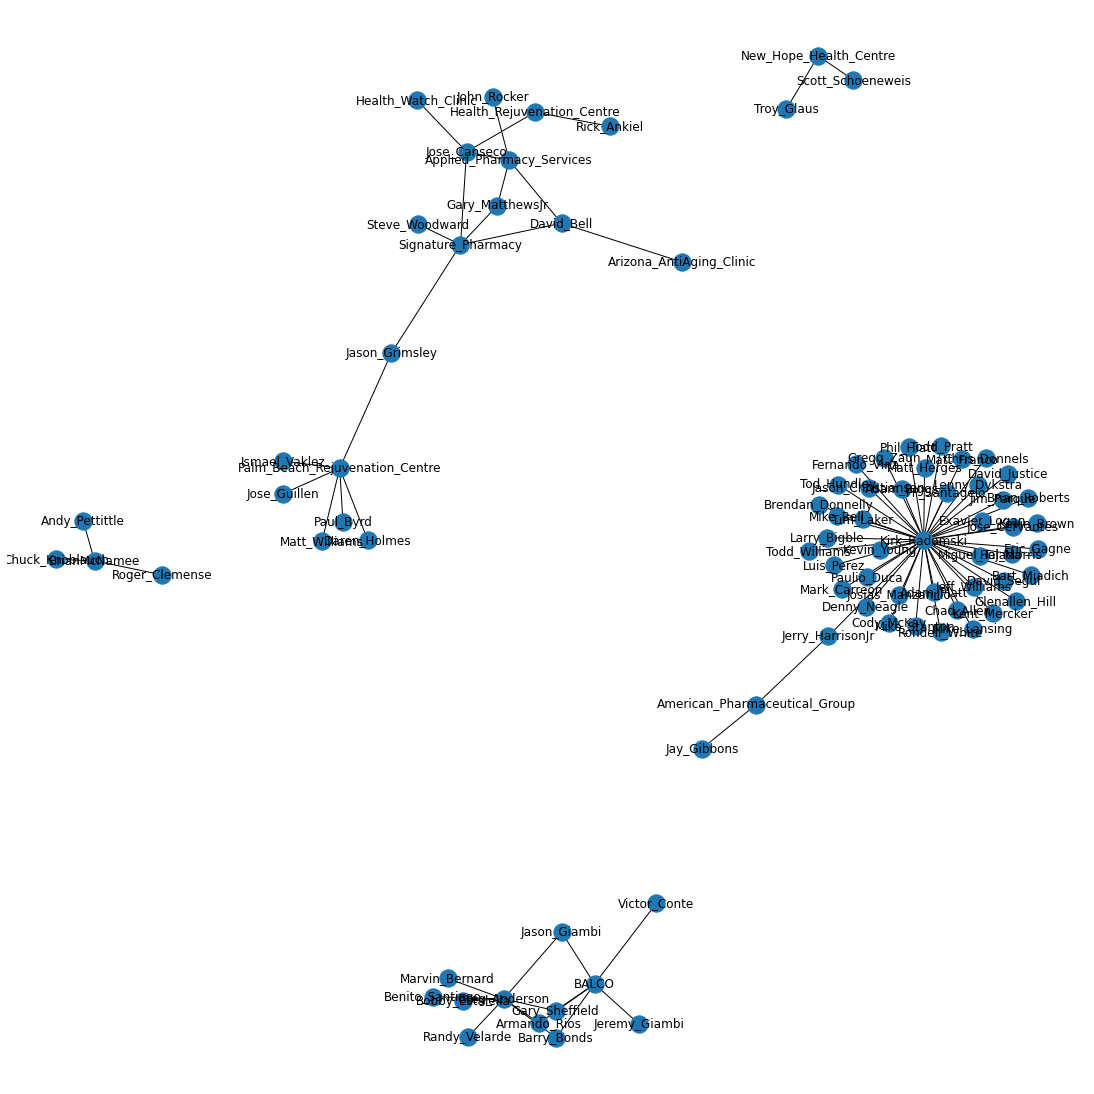

In [22]:
plt.figure(figsize=(15,15))
nx.draw(G, labels=attr_dict, with_labels=True, pos=nx.fruchterman_reingold_layout(G, k =0.35, iterations =120 ) )

# Section 2: Degree Centrality Measures

###  Proving Kirk Ramdowski is most influential in the network

In [185]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 84\nNumber of edges: 84\nAverage degree:   2.0000'

In [186]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 84
Number of edges: 84
Average degree:   2.0000


Below we depict the whole graphs as a whole to have a clear view of how Kirk Radomski has the most connections
*** The weighted node degree is the sum of the edge weights for edges incident to that node

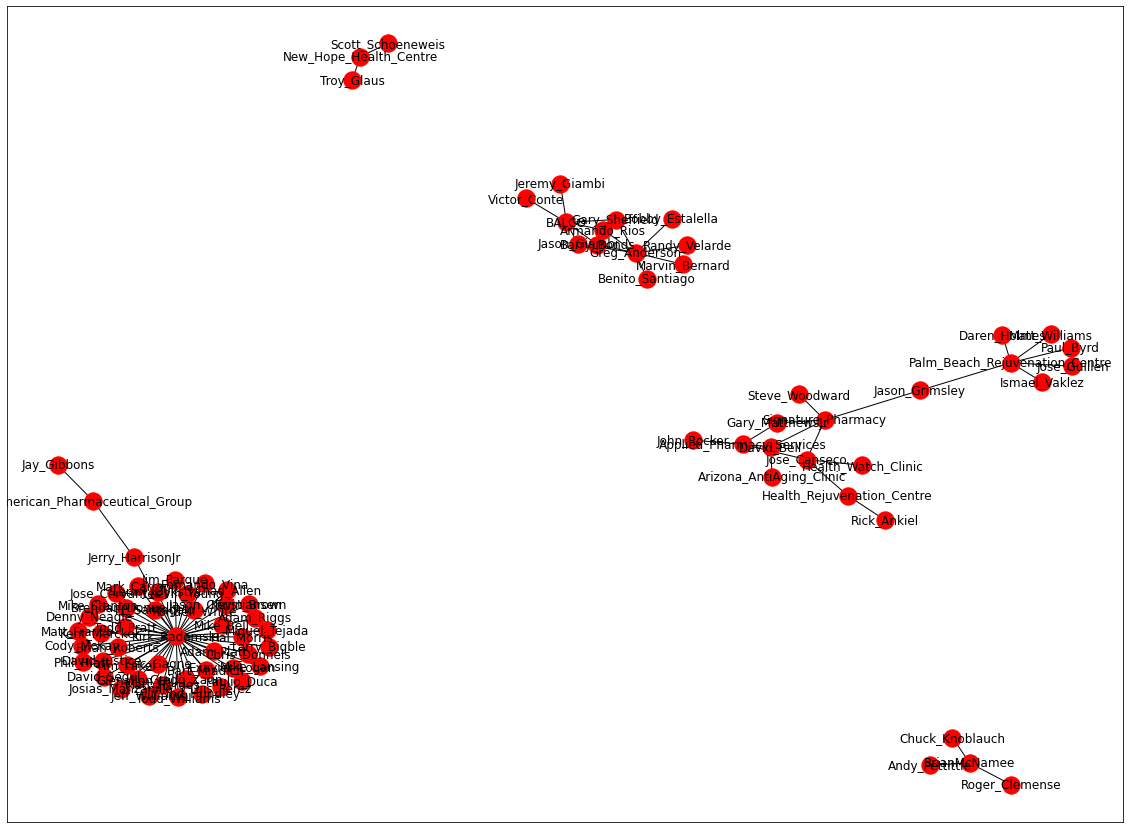

In [219]:
plt.figure(figsize=(20,15))
nx.draw_networkx(G, labels=attr_dict, with_labels=True, node_color='r')
plt.show()

Below we will demonstrate Analysis:

Degree Centrality

Most Influential

Most important connection

Best between


shortest path



In [224]:
nx.degree(G,11)
#We see Kirk Radomski has a degree value of 44

44

### Demonstrating Degree Centrality

In [227]:
nx.degree_centrality(G)
# We Kirk Radomski with a high value of 0.5301204819277109

# 1: 0.5301204819277109

{57: 0.012048192771084338,
 71: 0.012048192771084338,
 56: 0.012048192771084338,
 65: 0.012048192771084338,
 67: 0.012048192771084338,
 29: 0.012048192771084338,
 53: 0.012048192771084338,
 33: 0.04819277108433735,
 47: 0.012048192771084338,
 26: 0.012048192771084338,
 28: 0.012048192771084338,
 21: 0.012048192771084338,
 13: 0.012048192771084338,
 74: 0.012048192771084338,
 43: 0.012048192771084338,
 10: 0.03614457831325302,
 52: 0.012048192771084338,
 49: 0.012048192771084338,
 38: 0.012048192771084338,
 18: 0.012048192771084338,
 83: 0.012048192771084338,
 72: 0.012048192771084338,
 31: 0.024096385542168676,
 51: 0.012048192771084338,
 79: 0.012048192771084338,
 46: 0.012048192771084338,
 64: 0.012048192771084338,
 25: 0.012048192771084338,
 62: 0.012048192771084338,
 73: 0.012048192771084338,
 27: 0.024096385542168676,
 12: 0.012048192771084338,
 30: 0.012048192771084338,
 32: 0.03614457831325302,
 76: 0.012048192771084338,
 48: 0.012048192771084338,
 15: 0.024096385542168676,
 44:

In [83]:
sorted(nx.degree_centrality(G).values())

[0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.012048192771084338,
 0.01204819

In [84]:
most_influential = nx.degree_centrality(G)

In [228]:
for w in sorted(most_influential, key=most_influential.get, reverse=True):
    print(w, most_influential[w])
    
## We see for our most influential Kirk Radomski with a high value of 0.5301204819277109

11 0.5301204819277109
1 0.0963855421686747
0 0.07228915662650603
2 0.07228915662650603
4 0.060240963855421686
33 0.04819277108433735
7 0.04819277108433735
10 0.03614457831325302
32 0.03614457831325302
31 0.024096385542168676
27 0.024096385542168676
15 0.024096385542168676
44 0.024096385542168676
19 0.024096385542168676
14 0.024096385542168676
20 0.024096385542168676
3 0.024096385542168676
5 0.024096385542168676
6 0.024096385542168676
57 0.012048192771084338
71 0.012048192771084338
56 0.012048192771084338
65 0.012048192771084338
67 0.012048192771084338
29 0.012048192771084338
53 0.012048192771084338
47 0.012048192771084338
26 0.012048192771084338
28 0.012048192771084338
21 0.012048192771084338
13 0.012048192771084338
74 0.012048192771084338
43 0.012048192771084338
52 0.012048192771084338
49 0.012048192771084338
38 0.012048192771084338
18 0.012048192771084338
83 0.012048192771084338
72 0.012048192771084338
51 0.012048192771084338
79 0.012048192771084338
46 0.012048192771084338
64 0.01204

### Eigenvector Centrality to demonstrate most important connection

In [89]:
###Most important connection
nx.eigenvector_centrality

<function networkx.algorithms.centrality.eigenvector.eigenvector_centrality(G, max_iter=100, tol=1e-06, nstart=None, weight=None)>

eigenvector centrality (also called eigencentrality or prestige score) is a measure of the influence of a node in a network. Relative scores are assigned to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes. A high eigenvector score means that a node is connected to many nodes who themselves have high scores.



In [229]:
nx.eigenvector_centrality(G)


{57: 0.106540824218921,
 71: 0.106540824218921,
 56: 0.106540824218921,
 65: 0.106540824218921,
 67: 0.106540824218921,
 29: 4.9671354306691024e-21,
 53: 0.106540824218921,
 33: 1.6771155469091272e-12,
 47: 0.106540824218921,
 26: 2.6268710797343975e-13,
 28: 4.9671354306691024e-21,
 21: 2.487740532988975e-11,
 13: 1.9423691143571452e-11,
 74: 0.106540824218921,
 43: 0.106540824218921,
 10: 9.88881949536754e-19,
 52: 0.106540824218921,
 49: 0.106540824218921,
 38: 5.709312597618069e-19,
 18: 2.487740532988975e-11,
 83: 0.106540824218921,
 72: 0.106540824218921,
 31: 1.2650468141147457e-12,
 51: 0.106540824218921,
 79: 0.106540824218921,
 46: 0.106540824218921,
 64: 0.106540824218921,
 25: 2.6268710797343975e-13,
 62: 0.106540824218921,
 73: 0.106540824218921,
 27: 9.577326570034118e-13,
 12: 1.9423691143571452e-11,
 30: 6.950455490299721e-13,
 32: 1.4299776701180384e-12,
 76: 0.106540824218921,
 48: 0.106540824218921,
 15: 4.43010964734612e-11,
 44: 0.10907607410718388,
 82: 0.10654082

In [91]:
most_important_link = nx.eigenvector_centrality(G)

In [230]:
for w in sorted(most_important_link, key=most_important_link.get, reverse=True):
    print(w, most_important_link[w])
    
#We see Kirk Radomski with a high value of 0.7069103785761338

11 0.7069103785761338
44 0.10907607410718388
57 0.106540824218921
71 0.106540824218921
56 0.106540824218921
65 0.106540824218921
67 0.106540824218921
53 0.106540824218921
47 0.106540824218921
74 0.106540824218921
43 0.106540824218921
52 0.106540824218921
49 0.106540824218921
83 0.106540824218921
72 0.106540824218921
51 0.106540824218921
79 0.106540824218921
46 0.106540824218921
64 0.106540824218921
62 0.106540824218921
73 0.106540824218921
76 0.106540824218921
48 0.106540824218921
82 0.106540824218921
66 0.106540824218921
54 0.106540824218921
77 0.106540824218921
59 0.106540824218921
45 0.106540824218921
68 0.106540824218921
42 0.106540824218921
80 0.106540824218921
58 0.106540824218921
50 0.106540824218921
40 0.106540824218921
61 0.106540824218921
63 0.106540824218921
75 0.106540824218921
60 0.106540824218921
69 0.106540824218921
41 0.106540824218921
70 0.106540824218921
81 0.106540824218921
55 0.106540824218921
78 0.106540824218921
5 0.016821668796314138
35 0.002535249888262879
1 8.2

In [103]:
nx.shortest_path

<function networkx.algorithms.shortest_paths.generic.shortest_path(G, source=None, target=None, weight=None, method='dijkstra')>

# Betweeness Centrality
In graph theory, betweenness centrality (or "betweeness centrality") is a measure of centrality in a graph based on shortest paths. For every pair of vertices in a connected graph, there exists at least one shortest path between the vertices such that either the number of edges that the path passes through (for unweighted graphs) or the sum of the weights of the edges (for weighted graphs) is minimized. The betweenness centrality for each vertex is the number of these shortest paths that pass through the vertex.


In [116]:
nx.betweenness_centrality(G)

{57: 0.0,
 71: 0.0,
 56: 0.0,
 65: 0.0,
 67: 0.0,
 29: 0.0,
 53: 0.0,
 33: 0.014692918013517485,
 47: 0.0,
 26: 0.0,
 28: 0.0,
 21: 0.0,
 13: 0.0,
 74: 0.0,
 43: 0.0,
 10: 0.0008815750808110492,
 52: 0.0,
 49: 0.0,
 38: 0.0,
 18: 0.0,
 83: 0.0,
 72: 0.0,
 31: 0.001763150161622098,
 51: 0.0,
 79: 0.0,
 46: 0.0,
 64: 0.0,
 25: 0.0,
 62: 0.0,
 73: 0.0,
 27: 0.01939465177784308,
 12: 0.0,
 30: 0.0,
 32: 0.006464883925947694,
 76: 0.0,
 48: 0.0,
 15: 0.0011019688510138115,
 44: 0.025859535703790775,
 82: 0.0,
 16: 0.0,
 66: 0.0,
 24: 0.0,
 54: 0.0,
 77: 0.0,
 59: 0.0,
 45: 0.0,
 68: 0.0,
 11: 0.3032618277990009,
 22: 0.0,
 42: 0.0,
 39: 0.0,
 80: 0.0,
 58: 0.0,
 19: 0.0011019688510138115,
 50: 0.0,
 40: 0.0,
 23: 0.0,
 37: 0.0,
 17: 0.0,
 36: 0.0,
 35: 0.0,
 61: 0.0,
 63: 0.0,
 14: 0.0011019688510138115,
 75: 0.0,
 60: 0.0,
 69: 0.0,
 41: 0.0,
 70: 0.0,
 81: 0.0,
 55: 0.0,
 20: 0.0011019688510138115,
 34: 0.0,
 0: 0.006464883925947694,
 1: 0.010872759330002939,
 2: 0.02057008521892448,
 3: 

In [231]:
best_connector = nx.betweenness_centrality(G)
for w in sorted(best_connector, key=best_connector.get, reverse=True):
    print(w, best_connector[w])
    
#We see Kirk Radomski with a high value of 0.3032618277990009

11 0.3032618277990009
44 0.025859535703790775
4 0.025271818983250077
2 0.02057008521892448
27 0.01939465177784308
33 0.014692918013517485
5 0.013223626212165737
1 0.010872759330002939
7 0.006758742286218044
32 0.006464883925947694
0 0.006464883925947694
6 0.0047017337643255955
31 0.001763150161622098
15 0.0011019688510138115
19 0.0011019688510138115
14 0.0011019688510138115
20 0.0011019688510138115
10 0.0008815750808110492
3 0.0002938583602703497
57 0.0
71 0.0
56 0.0
65 0.0
67 0.0
29 0.0
53 0.0
47 0.0
26 0.0
28 0.0
21 0.0
13 0.0
74 0.0
43 0.0
52 0.0
49 0.0
38 0.0
18 0.0
83 0.0
72 0.0
51 0.0
79 0.0
46 0.0
64 0.0
25 0.0
62 0.0
73 0.0
12 0.0
30 0.0
76 0.0
48 0.0
82 0.0
16 0.0
66 0.0
24 0.0
54 0.0
77 0.0
59 0.0
45 0.0
68 0.0
22 0.0
42 0.0
39 0.0
80 0.0
58 0.0
50 0.0
40 0.0
23 0.0
37 0.0
17 0.0
36 0.0
35 0.0
61 0.0
63 0.0
75 0.0
60 0.0
69 0.0
41 0.0
70 0.0
81 0.0
55 0.0
34 0.0
8 0.0
9 0.0
78 0.0


# Subgroup Analysis
Comparison of BALCO(value 1) and Kirk Radomski(Value 11) to demonstrate immense influence by Kirk Radomski

In [125]:
group1 = nx.bfs_tree(G, 1)

In [169]:
group3 = nx.bfs_tree(G, 11)

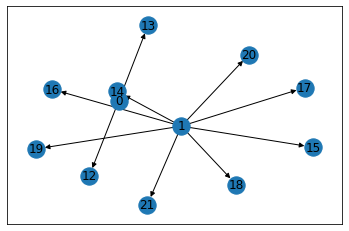

In [173]:
nx.draw_networkx(group1)

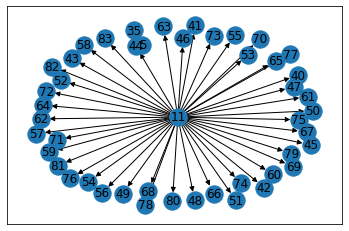

In [175]:
nx.draw_networkx(group3)

### Closeness Centrality

In [215]:
nx.closeness_centrality(G)

{57: 0.27121250961291976,
 71: 0.27121250961291976,
 56: 0.27121250961291976,
 65: 0.27121250961291976,
 67: 0.27121250961291976,
 29: 0.01606425702811245,
 53: 0.27121250961291976,
 33: 0.08290304073436604,
 47: 0.27121250961291976,
 26: 0.0561601243684415,
 28: 0.01606425702811245,
 21: 0.05607043558850788,
 13: 0.048594377510040164,
 74: 0.27121250961291976,
 43: 0.27121250961291976,
 10: 0.03614457831325301,
 52: 0.27121250961291976,
 49: 0.27121250961291976,
 38: 0.021686746987951807,
 18: 0.05607043558850788,
 83: 0.27121250961291976,
 72: 0.27121250961291976,
 31: 0.07254016064257028,
 51: 0.27121250961291976,
 79: 0.27121250961291976,
 46: 0.27121250961291976,
 64: 0.27121250961291976,
 25: 0.0561601243684415,
 62: 0.27121250961291976,
 73: 0.27121250961291976,
 27: 0.08704819277108433,
 12: 0.048594377510040164,
 30: 0.0669601482854495,
 32: 0.07569408067050812,
 76: 0.27121250961291976,
 48: 0.27121250961291976,
 15: 0.07289156626506026,
 44: 0.28326639892904953,
 82: 0.27121

Through player trades and free-agent signings, MLB does a good job of building multiple overlapping social networks. With players constantly changing teams, they form new links with new teammates, while maintaining many of their old ties to former teammates. This activity quickly creates a densely interconnected social network 

# Section 3 - infering subgroups analysis

Bipartite networks (or two mode networks) are a type of network in which nodes (or players) can be divided into two subsets based on the fact that there are no links between actors within each subset, only between the two. Because the performers are divided into two groups and there are no relationships between them,

 As we see in the whole undirected network, there are edges which exists between each and every nodes. Also after finding the largest two mode network from the first network, We will find other separate edges between the new nodes of the two mode network.

In [234]:
# We see in the subgraph [0] we have the highest number of edges and we are able to depict all the many many edges 
#from root Kirk Radomski
print(S[0].edges)

[('Kirk_Radomski', 57), ('Kirk_Radomski', 71), ('Kirk_Radomski', 56), ('Kirk_Radomski', 65), ('Kirk_Radomski', 67), ('Kirk_Radomski', 53), ('Kirk_Radomski', 47), ('Kirk_Radomski', 74), ('Kirk_Radomski', 43), ('Kirk_Radomski', 52), ('Kirk_Radomski', 49), ('Kirk_Radomski', 83), ('Kirk_Radomski', 72), ('Kirk_Radomski', 51), ('Kirk_Radomski', 79), ('Kirk_Radomski', 46), ('Kirk_Radomski', 64), ('Kirk_Radomski', 62), ('Kirk_Radomski', 73), ('Kirk_Radomski', 76), ('Kirk_Radomski', 48), ('Kirk_Radomski', 44), ('Kirk_Radomski', 82), ('Kirk_Radomski', 66), ('Kirk_Radomski', 54), ('Kirk_Radomski', 77), ('Kirk_Radomski', 59), ('Kirk_Radomski', 45), ('Kirk_Radomski', 68), ('Tod_Hundley', 11), ('Bart_Miadich', 11), ('Cody_McKay', 11), ('Exavier_Logan', 11), ('Brian_Roberts', 11), ('Rondell_White', 11), ('Mike_Stanton', 11), ('Tim_Laker', 11), ('Lenny_Dykstra', 11), ('Miguel_Tejada', 11), ('Todd_Pratt', 11), ('Kevin_Brown', 11), ('Jim_Parque', 11), ('Paulio_Duca', 11), ('American_Pharmaceutical_Group

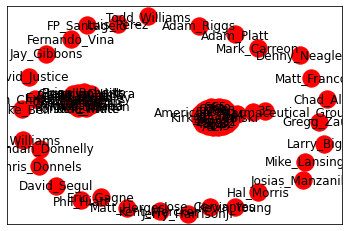

In [214]:
subgraph_choice = 0
col_map = [get_color(k) for k in nx.get_node_attributes(S[subgraph_choice], "bipartite").values()]
nx.draw_networkx(S[subgraph_choice], with_labels=True, node_color='r')
#fig1 = matplotlib.pyplot.gcf()
#fig1.set_size_inches(15, 20)
#fig1.show()

###### These edges exists between the newly formed nodes of the two mode network. Like this, we can infer the subgroups of the two mode network.

# Conclusion
Social network researchers measure network activity for a node by using the concept of degrees -- the number of direct connections a node has. In the analysis above, we see the providers have the most direct connections in the network, making them the most active nodes in the network. 
Providers are a 'connector' or 'hub' in this network. Common wisdom in personal networks is "the more connections, the better." This is not always so. What really matters is where those connections lead to -- and how they connect the otherwise unconnected.

## Citation
V. Krebs, "The Spread of Steroids in Baseball." http://orgnet.com/steroids.html (2008)